# Continuous Ranked Probability Score (CRPS)

Uncertainty is inherent in forecasting. Full forecast information, whether objective or subjective, will describe a range of possibilities. Scalar forecasts, with a forecast expressed as the probability of not exceeding various thresholds, with sufficient thresholds to treat it as a continuous forecast distribution, can be compared to observations via the CRPS function.

The CRPS may be considered as the Mean Absolute Error of the forecast distribution with respect to the observed distribution. Smaller values represent more accurate forecasts.

Further reading can be found at         

  - Matheson, J. E., and R. L. Winkler, 1976: Scoring rules for continuous probability distributions.
            Manage. Sci.,22, 1087–1095.
  - Gneiting, T., & Ranjan, R. (2011). Comparing Density Forecasts Using Threshold- and
            Quantile-Weighted Scoring Rules.
            Journal of Business & Economic Statistics, 29(3), 411–422. http://www.jstor.org/stable/23243806

In [1]:
from scores.probability import crps_cdf
import matplotlib.pyplot as plt

import numpy
import pandas
import scipy
import xarray

In [2]:
# Uncomment the following line and run to read the documentation regarding the crps_cdf funtion in scores.
# crps_cdf?

Question for Tennessee: Are there other crps functions in scores to which we should refer?

For the purpose of this tutorial, we will create a probabilistic forecast of temperature based on a normal distribution which we will compare to a single verifying observation.

In [3]:
fcst_thresholds = numpy.linspace(1, 10, 100)  # Let's consider a range of forecast values between 1 and 10 degrees

Text(0, 0.5, 'Probability Density')

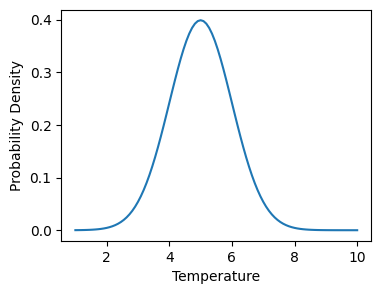

In [4]:
# Let's imagine the temperature will probably be around 5 degrees. We may imagine our forecast as per this graph 
fcst_pdf = scipy.stats.norm.pdf(fcst_thresholds, loc=5)
plt.figure(figsize=(4, 3))
plt.plot(fcst_thresholds, fcst_pdf)
plt.xlabel("Temperature")
plt.ylabel("Probability Density")

Text(0, 0.5, 'Probability')

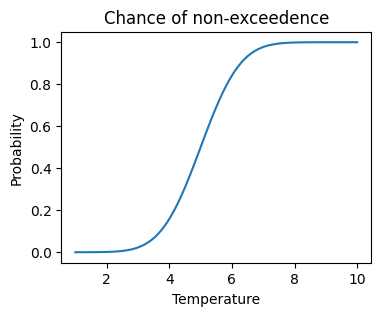

In [5]:
# We show the same function as aa cumulative probability distribution. 
# Each point on this curve gives the probability that the temperature will be X or lower.
# It is certain (probability 1) that the the temperature will be 10 or less. 
# It is pretty likely the temperature will be no more than 6 degrees. 
# There is a 50% chance of it being no more than 5 degrees.
fcst_cdf = scipy.stats.norm.cdf(fcst_thresholds, loc=5)
plt.figure(figsize=(4, 3))
plt.plot(fcst_thresholds, fcst_cdf)
plt.title("Chance of non-exceedence")
plt.xlabel("Temperature")
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

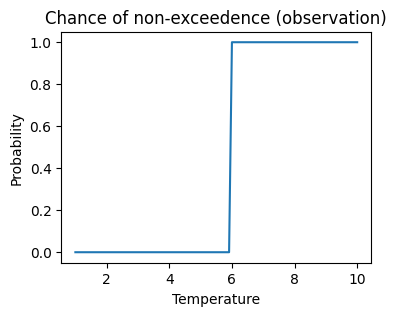

In [6]:
# Let's say we observed a temperature of 6 degrees. 
# Once we have the observation, there is no chance of observing no more than 5.9 degrees
# There is 100% chance of observing no more than 6 degrees, as there is no more than 8 degrees.
# The perfect forecast would have been a step function at temperature=6. 
observed = 6
observed_cdf = numpy.heaviside(fcst_thresholds-observed, 1)
plt.figure(figsize=(4, 3))
plt.plot(fcst_thresholds, observed_cdf)
plt.title("Chance of non-exceedence (observation)")
plt.xlabel("Temperature")
plt.ylabel("Probability")

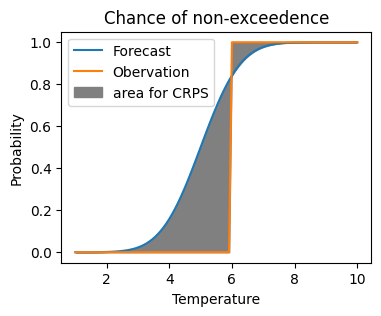

In [7]:
# We now compare the forecast cdf to the cdf representing the observation.
# The area of the difference between the two curves is the CRPS.
plt.figure(figsize=(4, 3))
plt.plot(fcst_thresholds, fcst_cdf, label='Forecast')
plt.plot(fcst_thresholds, observed_cdf, label='Obervation')
plt.fill_between(fcst_thresholds, fcst_cdf, observed_cdf, color='gray', label='area for CRPS')
plt.title("Chance of non-exceedence")
plt.xlabel("Temperature")
plt.ylabel("Probability")
plt.legend(loc="upper left")

In [8]:
# To use the crps_cdf function we need the forecast to be an xarray with values giving the cdf at each of many thresholds
fcst_array = xarray.DataArray(coords={'temperature': fcst_thresholds}, data=fcst_cdf)

# The observation is the value, but again provided in an xarray
obs_array = xarray.DataArray(6)

# When working with real data you are likely to have coordinates for the forecast and observation representing the 
# location and time, allowing you to assess many forecasts at once.

In [9]:
# Here we calculate the CRPS for the forecast and observation above
crps_cdf(fcst_array, obs_array, threshold_dim='temperature').total.values.round(3)

/home/deryng/dev/scores/src/scores/probability/functions.py:127: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  thresholds = np.sort(pd.unique(thresholds))


0.602

### Things to try next

Try modifing the forecast or observation in the example above to explore the response of the CRPS  
Use crps_cdf with some forecasts and observations with extra dimensions in space and/or time.  
Use the preserve_dims option to provde the CRPS in a less summarised version across the extra dimensions.  
Compare the two integration methods, using limited forecast thresholds to make the difference more obvious. 

